<a href="https://colab.research.google.com/github/amir-baradaran/predict_Gram_18karat_index/blob/main/Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
!pip install sentencepiece
!pip install bs4
!pip install requests
!pip install transformers
'''

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from bs4 import BeautifulSoup
plt.style.use('fivethirtyeight')


In [ ]:
#*************************LSTM*************************

In [2]:
from google.colab import files
uploaded=files.upload()

Saving all_data.csv to all_data.csv


In [3]:
df=pd.read_csv('all_data.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df



,Name,Date,Open,High,Low,Close,Period,Unnamed: 7,Unnamed: 8
2013-04-16,Gram18Ayar,4/16/2013,1246600,1251200,1230400,1246600,D,92/1/27,NaN
2013-04-17,Gram18Ayar,4/17/2013,1244300,1248900,1237400,1246600,D,NaN,NaN
2013-04-20,Gram18Ayar,4/20/2013,1253500,1261600,1250100,1253500,D,NaN,NaN
2013-04-21,Gram18Ayar,4/21/2013,1254700,1272000,1254200,1272000,D,92/2/1,NaN
2013-04-22,Gram18Ayar,4/22/2013,1278900,1306600,1275500,1289300,D,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-12,Gram18Ayar,3/12/2023,20661200,21342200,19691600,19968600,D,NaN,NaN
2023-03-13,Gram18Ayar,3/13/2023,20845800,21873100,20845800,21700000,D,NaN,NaN
2023-03-14,Gram18Ayar,3/14/2023,22000100,23177400,22000100,22715700,D,NaN,NaN
2023-03-15,Gram18Ayar,3/15/2023,23108200,23223600,22484900,23165900,D,NaN,NaN


In [4]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)


In [5]:
training_data=scaled_data[0:training_data_len , :]

In [6]:
xtrain=[]
ytrain=[]
n=150

In [7]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

In [8]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)

In [9]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1760, 150, 1)

In [10]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=1)

1760/1760 [==============================] - 134s 74ms/step - loss: 6.7514e-04


In [12]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len: , :]
for i in range(n,len(test_data)):
    xtest.append(test_data[i-n:i,0])  

In [13]:
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [14]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)

15/15 [==============================] - 2s 40ms/step
1645217.924710441


In [15]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

<ipython-input-15-345babb7f3ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


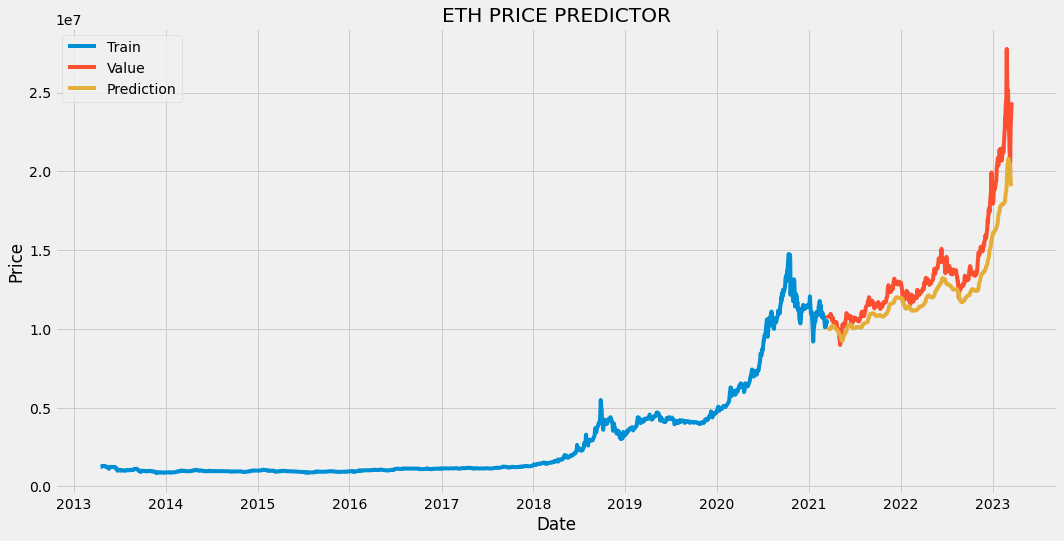

In [16]:
plt.figure(figsize=(16,8))
plt.title('ETH PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [17]:
forecast_range = 1
new_df = df.filter(['Close'])

In [18]:
new_df[-n:].values

array([[13550000],
       [13676000],
       [13725000],
       [13559000],
       [13272000],
       [13282000],
       [13005000],
       [13028000],
       [12845000],
       [11968000],
       [12361000],
       [12337000],
       [12511000],
       [12485000],
       [12730000],
       [12561000],
       [12647000],
       [12654000],
       [12691000],
       [12695000],
       [12834000],
       [12730000],
       [12762000],
       [12758000],
       [12850000],
       [12989000],
       [13259000],
       [13379000],
       [13252000],
       [13092000],
       [13069000],
       [13065000],
       [13212000],
       [13109000],
       [13113000],
       [13173000],
       [13743000],
       [13767000],
       [13928000],
       [13986000],
       [13755000],
       [13501000],
       [13538000],
       [13598000],
       [13614000],
       [13457000],
       [13550000],
       [13492000],
       [13450000],
       [13404000],
       [13543000],
       [13420000],
       [1336

In [19]:
pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = forecast_range+1 , closed = 'right')

pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))

<ipython-input-19-0fdf7f96294e>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = forecast_range+1 , closed = 'right')


In [20]:

pred_df

,Date
2023-03-19,2023-03-19


In [21]:
predictiondata = []

In [22]:
for i in range(0, forecast_range):
    last_values = new_df[-n:].values
    last_values_scaled = scaler.transform(last_values)
    X_input = []
    X_input.append(last_values_scaled)
    X_input = np.array(X_input)
    X_test = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
    pred_value = model.predict(X_input)
    pred_value_unscaled = scaler.inverse_transform(pred_value)
    dfindex = pred_df.iloc[[i]].index 
    new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))
    predictiondata.append(pred_value_unscaled[0,0])

1/1 [==============================] - 0s 48ms/step


<ipython-input-22-a435facee083>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))


In [24]:
new_df.tail(1)

,Close
2023-03-19,19090074.0
